<a href="https://colab.research.google.com/github/alirezash97/Galaxy-Classification/blob/master/Galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install kaggle
# !mkdir .kaggle
# import json
# token = {"username":"alirezashafaei97","key":"9cb262aa0c5658ffc4eb45857c41903c"}
# with open('/content/.kaggle/kaggle.json', 'w') as file:
#     json.dump(token, file)
# !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
# !kaggle config set -n path -v{/content}
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets list
# !kaggle datasets list -s galaxy-zoo
# !kaggle datasets download -d zhuangjw/galaxy-zoo-cleaned -p /content
# !unzip /content/galaxy-zoo-cleaned.zip
# !pip install netCDF4

[0.950155   0.         0.049845   0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.142862   0.857138   0.9128833  0.03727173 0.
 0.         0.02385795 0.         0.         0.071431   0.04757304
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


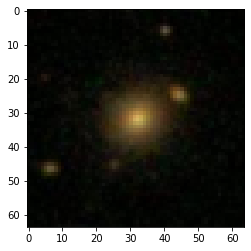

[0.326782   0.64144    0.031777   0.15993729 0.4815027  0.
 0.4815027  0.310446   0.17105673 0.09023072 0.39127198 0.
 0.         0.184619   0.815381   0.         0.23445237 0.09232964
 0.         0.0369238  0.1107714  0.         0.0369238  0.
 0.         0.10971554 0.         0.05022175 0.1974275  0.11301848
 0.         0.         0.         0.         0.         0.
 0.310446  ]


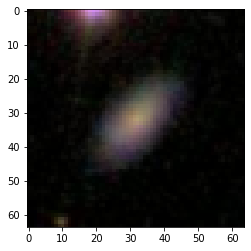

[0.107013   0.881299   0.011687   0.7754515  0.10584754 0.05251255
 0.05333498 0.         0.10584754 0.         0.10584754 0.
 0.         0.452513   0.547487   0.         0.01908737 0.08792563
 0.04004152 0.         0.16069324 0.03021067 0.15662153 0.
 0.06494557 0.37610483 0.17203623 0.22731042 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


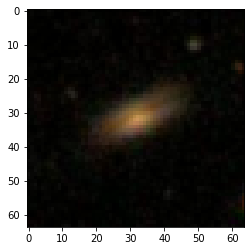

[0.865847   0.106967   0.027187   0.0534835  0.0534835  0.
 0.0534835  0.         0.0534835  0.         0.02940806 0.02407544
 0.         0.051114   0.948886   0.00370323 0.31727752 0.54486626
 0.00608257 0.         0.         0.         0.04503144 0.
 0.         0.02674175 0.02674175 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


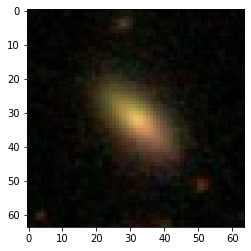

[2.8729999e-02 9.7127002e-01 0.0000000e+00 9.7127002e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7884700e-01 8.2115299e-01
 9.2199998e-04 0.0000000e+00 2.7807852e-02 9.6659653e-02 4.1093674e-02
 4.1093674e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.8412763e-01 2.8714237e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


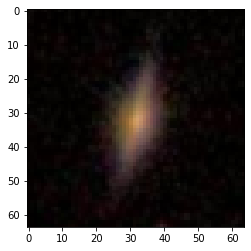

In [137]:
import netCDF4
f = netCDF4.Dataset('/content/galaxy_train.nc')
images = f.variables['image_train']
labels = f.variables['label_train']
for i in range(5):
  print(labels[i+1000][:])
  plt.imshow(images[i+1000])
  plt.show()

In [120]:
for d in f.dimensions.items():
  print(d)

('sample', <class 'netCDF4._netCDF4.Dimension'>: name = 'sample', size = 61578)
('x', <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 64)
('y', <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 64)
('channel', <class 'netCDF4._netCDF4.Dimension'>: name = 'channel', size = 3)
('feature', <class 'netCDF4._netCDF4.Dimension'>: name = 'feature', size = 37)


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import Model
import cv2
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
base_dir = '/content/drive/My Drive/Galaxy Classification'
trainset_dir = os.path.join(base_dir, 'trainset')
trainset_fnames = os.listdir(trainset_dir)
print(trainset_fnames)

['d_mach_milkywayshape_190205.jpg', 'm51better-2.jpeg', 'ssc2019-15b_med.jpg']


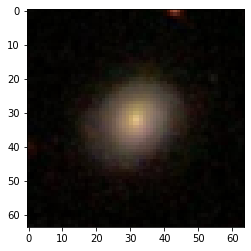

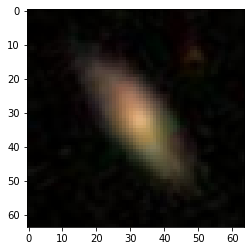

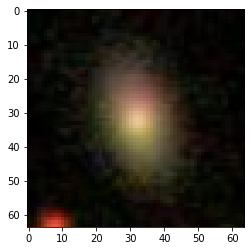

In [150]:
trainset_images = images[:3]

x = []
for img in trainset_images:

  x.append(img)
  plt.imshow(img)
  plt.show()
m = len(x)


In [91]:
for img_input in x:
  img_input = layers.Input(shape=(1000, 1500, 3))

  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)

  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  x = layers.Conv2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)
  output = layers.Dense(1, activation='sigmoid')(x)
  model = Model(img_input, output)
  plt.imshow(img_input)
  plt.show()
model.summary()

OperatorNotAllowedInGraphError: ignored



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 390.81it/s]

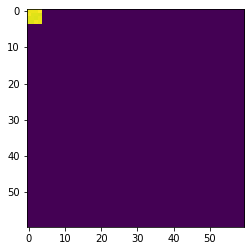



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 761.80it/s]

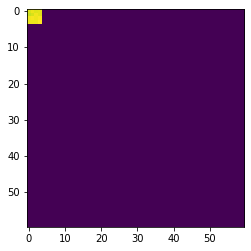



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 745.62it/s]

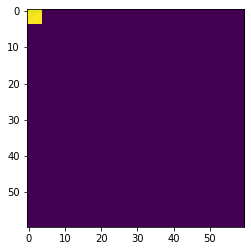

In [149]:

layer1 = []
for image in x:
  feature = np.zeros((60, 60))
  for i in tqdm(range(4)):
    for j in range(4):
      mask = np.random.choice([0, 1], size=(60,60), p=[3./10, 7./10]) 
      img = image[ i:i+60, j:j+60]
      temp = np.sum(mask*img)
      feature[i][j] = max(0, temp)
  plt.imshow(feature)
  plt.show()
  layer1.append(feature)


In [0]:
maxpool_layer = []
for image in layer1:
  maxpool = np.zeros((20, 20))
  for i in range(0, int(image.shape[0] / 5) ):
    for j in range(0, int(image.shape[1] / 5) ):
      temp = image[ i*5 : (i+1)*5, j*5 : (j+1)*5]
      pool = np.max(temp)
      maxpool[i][j] = pool
  maxpool_layer.append(maxpool)



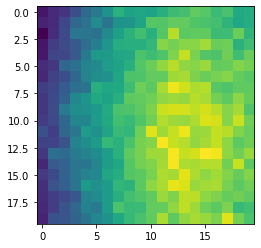

In [80]:
len(maxpool_layer)
for image in maxpool_layer:
  plt.imshow(image)
  plt.show()

In [0]:
x = np.array(x).reshape((m, 4500000))

In [0]:
class NeuralNetwork:


  def __init__(self, layers, learning_rate, x, y):
    self.layers = layers
    self.learning_rate = learning_rate
    self.x = x
    self.y = y
  
  

  
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
  

  
  def initialization(self):
    for i in range(1, len(self.layers)):
        w0 = globals()['w%s' % 0] = np.zeros((self.x.shape[1], self.layers[0]))
        b0 = globals()['b%s' % 0] = np.ones((self.layers[0], 1))
        globals()['w%s' % i] = np.zeros((self.layers[i-1], self.layers[i]))
        globals()['b%s' % i] = np.ones((self.layers[i], 1))
    globals()['w%s' % (len(self.layers))] = np.zeros((self.layers[i], 1))
    globals()['b%s' % (len(self.layers))] = np.ones((1, 1))
    return None
    
  
  def forwardPropagation(self):
    for i in range(2, len(self.layers) + 1):
      globals()['z%s' % 1] = np.dot(self.x, globals()['w%s' % 0]) + globals()['b%s' % 0].T
      globals()['a%s' % 1] = self.sigmoid(globals()['z%s' % 1])
      globals()['z%s' % i] = np.dot(globals()['a%s' % (i-1)], globals()['w%s' % (i-1)]) + globals()['b%s' % (i-1)].T
      globals()['a%s' % i] = self.sigmoid(globals()['z%s' % i])
      if i == (len(self.layers)) :
        globals()['z%s' % (len(self.layers) + 1)] = np.dot(globals()['a%s' % (i)], globals()['w%s' % (i)]) + globals()['b%s' % (i)].T
        globals()['a%s' % (len(self.layers) + 1)] = self.sigmoid(globals()['z%s' % (len(self.layers) + 1)])
    return None

  def backpropagation(self):
    
    
    globals()['da%s' % (len(self.layers) + 1)] = 0
    for j in range(self.x.shape[0] - 1 ):
      globals()['da%s' % (len(self.layers) + 1)] += ( -y[j] / globals()['a%s' % (len(self.layers) + 1)][j] ) + ( (1 - y[j]) / (1 - globals()['a%s' % (len(self.layers) + 1)][j]) )
    # globals()['dz%s' % len(self.layers) + 1)] = globals()['da%s' % len(self.layers) + 1)] * sigmoid()
    

  
  def output(self):
    print("\n", self.x)
    for i in range(1, len(self.layers) + 2):
      print("\n", globals()['z%s' % i])
      print("\n", globals()['a%s' % i])
    print(" i am da for last layer", globals()['da%s' % (len(self.layers) + 1)])
    return None


#############################
neural = NeuralNetwork([4, 3, 2], 0.15, np.array([[1, 5, 3], [4, 6, 1], [9, 1, 5]]), [0, 1, 1])
neural.initialization()
neural.forwardPropagation()
neural.backpropagation()
neural.output()
##############################
